# Instructions on how to run this file
I have my datafiles as well as trained model saved on personal google drive. If you have it on your drive then please mount your drive before running this code and change filepath accordingly. If you have it locally, then please change the file paths to your local directory.

Please ensure you have all the required libraries (as described in section importing libraries) installed in your system. If not, then please use pip install <library name> to install the packages.

Trained model can be loaded directly (using the .h5 file provided) and all the code lines for test file and prediction can then be run.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!mkdir Birds
!unzip "/content/gdrive/My Drive/birds.zip" -d Birds

Streaming output truncated to the last 5000 lines.
  inflating: Birds/train/TEAL DUCK/112.jpg  
  inflating: Birds/train/TEAL DUCK/113.jpg  
  inflating: Birds/train/TEAL DUCK/114.jpg  
  inflating: Birds/train/TEAL DUCK/115.jpg  
  inflating: Birds/train/TEAL DUCK/116.jpg  
  inflating: Birds/train/TEAL DUCK/117.jpg  
  inflating: Birds/train/TEAL DUCK/118.jpg  
  inflating: Birds/train/TEAL DUCK/119.jpg  
  inflating: Birds/train/TEAL DUCK/120.jpg  
  inflating: Birds/train/TEAL DUCK/121.jpg  
  inflating: Birds/train/TEAL DUCK/122.jpg  
  inflating: Birds/train/TEAL DUCK/123.jpg  
  inflating: Birds/train/TEAL DUCK/124.jpg  
  inflating: Birds/train/TEAL DUCK/125.jpg  
  inflating: Birds/train/TEAL DUCK/126.jpg  
  inflating: Birds/train/TEAL DUCK/127.jpg  
  inflating: Birds/train/TEAL DUCK/128.jpg  
  inflating: Birds/train/TEAL DUCK/129.jpg  
  inflating: Birds/train/TEAL DUCK/130.jpg  
  inflating: Birds/train/TEAL DUCK/131.jpg  
  inflating: Birds/train/TEAL DUCK/132.jpg  
  in

In [3]:
pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 14.6 MB/s eta 0:00:01


In [14]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
import tensorflow_addons as tfa
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.metrics import FalseNegatives, Precision, Recall, TruePositives, Accuracy, TrueNegatives, FalsePositives
from sklearn.metrics import classification_report, confusion_matrix
import cv2

In [4]:
# Image augmentation and reading by using Generators

train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('Birds/train',target_size=(224, 224),batch_size=64,class_mode='categorical')

#Creating generator for Validation DataSet
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory('Birds/valid',target_size=(224, 224),batch_size=32,class_mode='categorical')


Found 35215 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.


In [ ]:
tf.random.set_seed(5)

In [ ]:
# Using ResNet50 model
base_model1=tf.keras.applications.ResNet50(include_top=False, weights="imagenet",  input_shape=(224,224,3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# Freezing base layers
base_model1.trainable = False

In [ ]:
# Adding further layers
model=Sequential()
model.add(base_model1)
model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(2048,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(250,activation='softmax'))

In [ ]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 2048)              205522944 
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 250)               5

In [ ]:
# Compiling model
metrics= [Precision(), Recall(), 'accuracy', F1Score(250)]
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=metrics)

In [ ]:
history1=model.fit(train_generator,epochs=10,validation_data=val_generator)

Epoch 1/10
551/551 [==============================] - 537s 944ms/step - loss: 3.9573 - precision: 0.6696 - recall: 0.1284 - accuracy: 0.2289 - f1_score: 0.2115 - val_loss: 1.0313 - val_precision: 0.9395 - val_recall: 0.5712 - val_accuracy: 0.7888 - val_f1_score: 0.7723
Epoch 2/10
551/551 [==============================] - 517s 938ms/step - loss: 1.7564 - precision: 0.7677 - recall: 0.4792 - accuracy: 0.5782 - f1_score: 0.5656 - val_loss: 0.4236 - val_precision: 0.9476 - val_recall: 0.8104 - val_accuracy: 0.8840 - val_f1_score: 0.8795
Epoch 3/10
551/551 [==============================] - 510s 925ms/step - loss: 1.1859 - precision: 0.8222 - recall: 0.6383 - accuracy: 0.7040 - f1_score: 0.6956 - val_loss: 0.2896 - val_precision: 0.9592 - val_recall: 0.8840 - val_accuracy: 0.9256 - val_f1_score: 0.9224
Epoch 4/10
551/551 [==============================] - 510s 926ms/step - loss: 0.9340 - precision: 0.8511 - recall: 0.7173 - accuracy: 0.7647 - f1_score: 0.7582 - val_loss: 0.2502 - val_preci

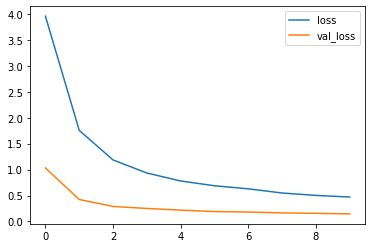

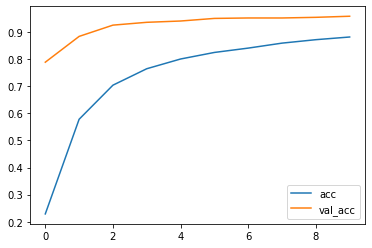

In [ ]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history1.history['accuracy'], label='acc')
plt.plot(history1.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
# saving model
model.save("/content/gdrive/My Drive/Birds_resnet.h5")

In [5]:
# Loading model
model = keras.models.load_model('/content/gdrive/MyDrive/Birds_resnet.h5')

In [22]:
#Creating generator for Test DataSet
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory('Birds/test',target_size=(224, 224),batch_size=32,class_mode='categorical', shuffle=False)

Found 1250 images belonging to 250 classes.


In [18]:
# Getting Predictions
y_pred= model.evaluate(test_generator)

40/40 [==============================] - 153s 4s/step - loss: 0.0987 - precision: 0.9797 - recall: 0.9648 - accuracy: 0.9720 - f1_score: 0.9720


In [25]:
# Confusion Matrix
Y_pred1= model.predict_generator(test_generator)
y_pred1 = np.argmax(Y_pred1, axis=1)
print('Confusion Matrix')
cf_matrix= (confusion_matrix(test_generator.classes, y_pred1))
print(cf_matrix)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[5 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 5]]


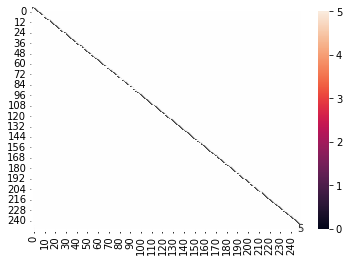

In [17]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

### Testing on unknown images

In [2]:
# Loading model
model = keras.models.load_model('C:/Users/Aditi Sony/Downloads/Deep Learning/Project/Birds/Birds_resnet.h5')

In [11]:
# Creating dictionary for class labels
Classes = train_generator.class_indices
Dictionary = {i:u for u,i in Classes.items()}

In [16]:
# Reading images
Image = cv2.imread("C:/Users/Aditi Sony/Downloads/Deep Learning/Project/Birds/birds/Test_image/bird.jpg")
Image = cv2.resize(Image, (224, 224)) # Resizing the Image

In [17]:
Prediction = model.predict((np.array([Image]))) # Rescaling the Image
Prediction = np.argmax(Prediction) # Extracting the Maximum Class

Bird: WHIMBREL


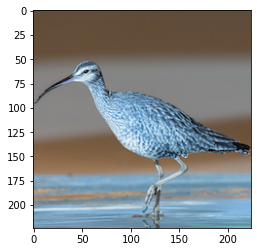

In [18]:
plt.imshow(Image) # Displaying the Image
print('Bird:', Dictionary[Prediction]) # Printing the Prediction